# ReCell _ Linear regression

# Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

# Importing necessary libraries

In [1]:
# to manipluate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data set into testing and training
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score, mean_absolute_percentage_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/recell-used-devices-prices/used_device_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/recell-used-devices-prices/used_device_data.csv')

# Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
df.shape

(3454, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
df.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### ***Observation on data overview and sanity check:***
##### 1 The dataset consists of 3454 rows and 15 columns.
##### 2 There are 4 variables with the type categorial, and the rest are numerical.
##### 3 We can observe some missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight.
##### 4 There are no duplicates in the dataset.
##### 5 There are 34 unique brands in the column (brand_name).The most popular brand name is in the category (others).
##### 6 There are 4 categories of operational systems in the column(os). The most popular os is Android.
##### 7 The maximum screen size is 30 cm which could be for tablets, and the minimum screen size is 5 cm which could be for phones that are not smartphone and old fashioned.
##### 8 Both 4g and 5g columns have a yes or no values.
##### 9 The majority of devices DO NOT support 5g (3302 out of 3454). On the other hand, the majority of devices support 4g (2335 out of 3454).



# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## **`Questions Answers`**

#### **1 What does the distribution of normalized used device prices look like?**

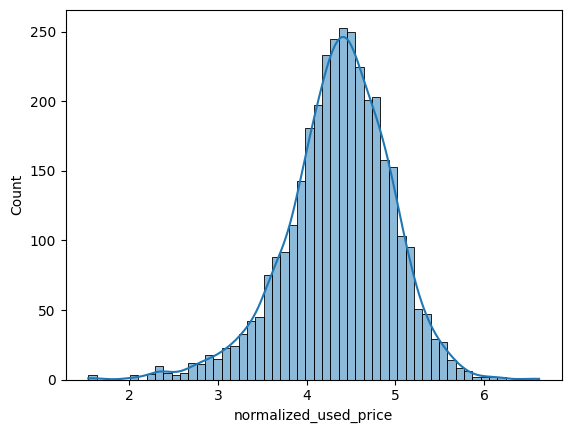

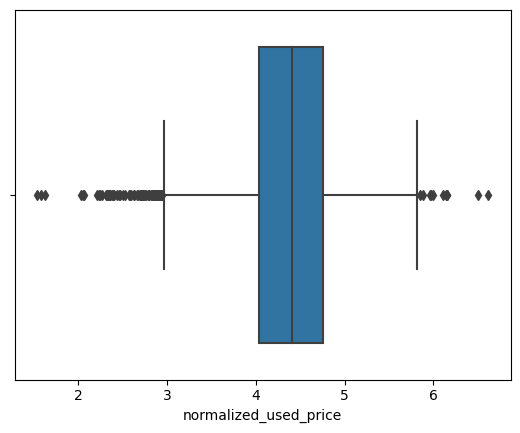

In [10]:
sns.histplot(data=df,x=df['normalized_used_price'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['normalized_used_price'])
plt.show()

#### Answer to question 1: The distribution of the normalized used prices looks normally distributed, with a mean of 5.23 and median of 5.25. However, it is affected by some outliers shown in the boxplot.

#### **2 What percentage of the used device market is dominated by Android devices?**

In [11]:
df['os'].value_counts(True)['Android']

0.9305153445280834

#### Answer to question 2: the percentage of the Android devices is 93%.

#### **3 The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

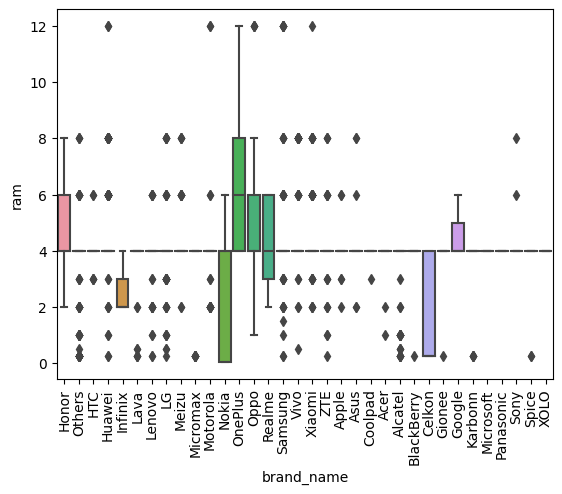

In [12]:
sns.boxplot(data=df,x= df['brand_name'],y=df['ram'])
plt.xticks(rotation = 90)
plt.show()

#### Answer to question 3:
##### 1 It seems that newly established brands have higher RAMs. For example, One Plus minimum RAM is at around 4, while its maximum RAM is at around 8, also its median is around 6.
##### 2 On the other hand, old brands tend to have lower RAMs. For example, Infinix & Nokia & Celkon are showing very low RAMs.

#### **4 A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [13]:
# create a seperated dataframe for batteries with more than 4,500 mAh
df1 = df[df['battery'] > 4500]
# lets have how many devices we have with battery > 4500 mAh
df1.shape

(341, 15)

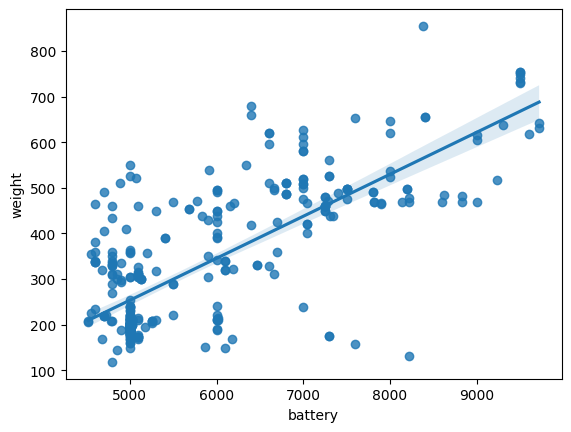

In [14]:
# now lets see how the weight varies for devices with battery > 4500 mAh
sns.regplot(data=df1,x=df1['battery'],y=df1['weight'])
plt.show()

In [15]:
np.corrcoef(x=df1['battery'],y=df1['weight'])

array([[1.        , 0.75762163],
       [0.75762163, 1.        ]])

#### Answer to question 4:
#### 1 there are 341 devices with large batteries ( more than 4500 mAh) in this dataset.
#### 2  the correlation between large batteries (more than 4500 mAh) and the weight is around 0.76. This means that for each increase in battery size, the weight increases by 76%. this implies a strong positive relation between those two variables.
#### 3 an interesting observation can be seen while looking at the correlation chart, where some devices with batteries over 7000 mAh have small weight. This does not make alot of sense and could be a data error.

#### **5 Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [16]:
# lets create a seperated dataframe for devices with a screen size larger than 6 inches
df2 = df[df['screen_size']>6*2.54]
df2.shape

(1099, 15)

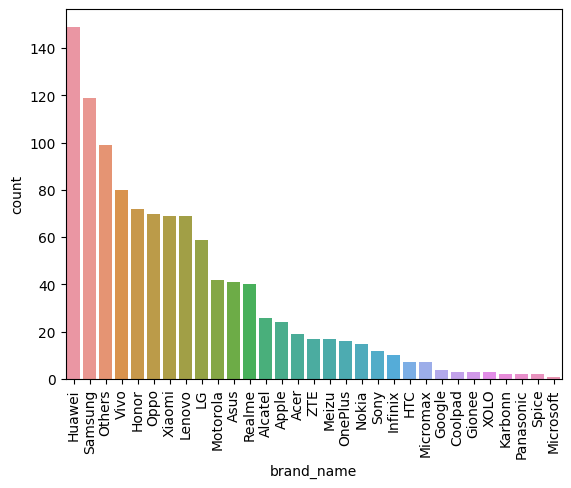

In [17]:
sns.countplot(data=df2,x=df2['brand_name'],order=df2['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Answer to question 5:
#### 1 There are 1099 devices with screen size 9 inches ( or 9 * 2.54 cm) in this dataset.
#### 2 The Huawei has the most devices with big screen size (around 149), followed by Samsung (around 119).
#### 3 Noticably, there are around 99 devices with big screen sizes yet no brand name.

#### **6 A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [18]:
# create a seperated dataframe for devices offering greater than 8 MP selfie cameras
df3 = df[df['selfie_camera_mp']>8]
df3.shape

(655, 15)

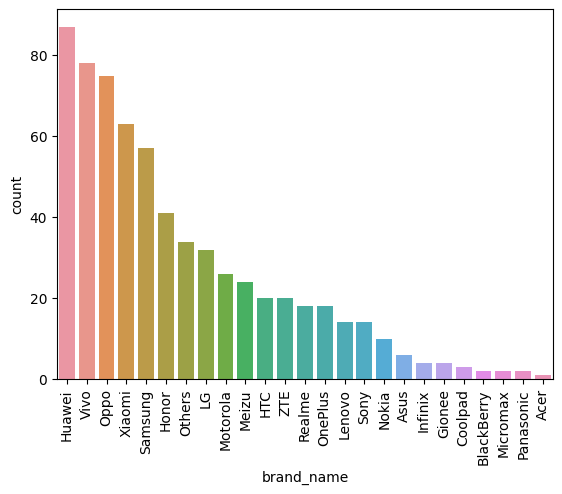

In [19]:
sns.countplot(data=df3,x=df3['brand_name'],order=df3['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Answer to question 6:
#### 1 There are 655 devices that offer a selfie camera with more than 8 mp.
#### 2 Huawei has the most devices that offer a selfie camera with more than 8 mp (around 87), then Vivo offers around 78.

#### **7 Which attributes are highly correlated with the normalized price of a used device?**

In [20]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

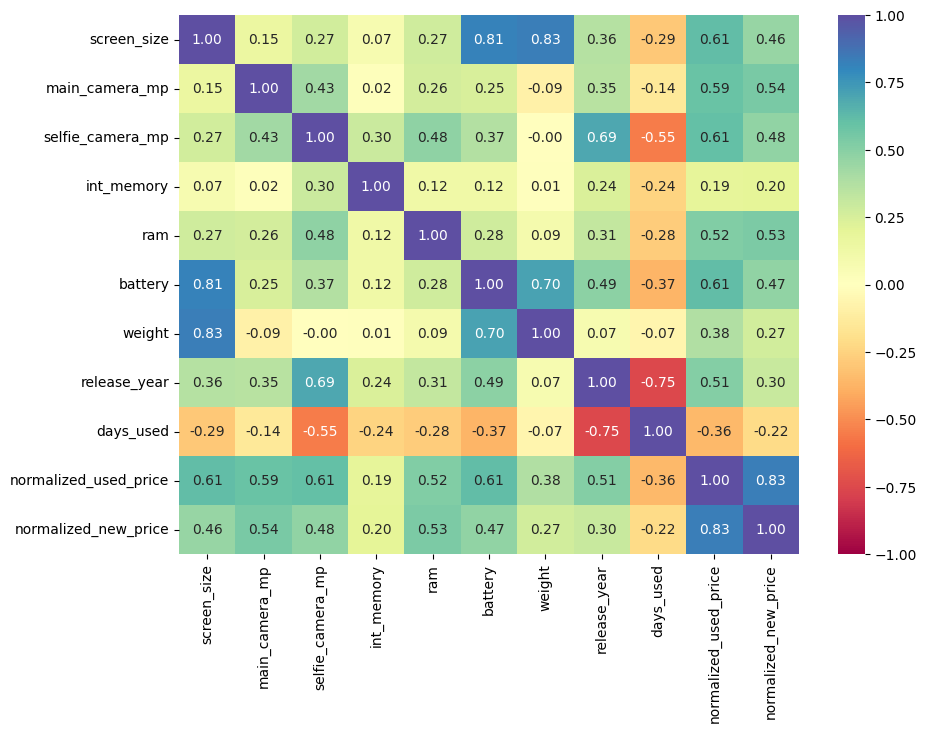

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df[num_col].corr(),vmin=-1,vmax=1,cmap='Spectral',fmt='.2f',annot=True)
plt.show()

#### Answer to question 7: The attributes that are highly correlated are the followings:
##### normalized new price 83%
##### screen size 61%
##### selfie camera mp 61%
##### battery 61%
##### main camera mp 59%
##### ram 52%
##### release year 51%


### **1 Univariate Analysis**

#### 1 Brand name

In [22]:
df['brand_name'].value_counts().head()

brand_name
Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
Name: count, dtype: int64

In [23]:
df['brand_name'].value_counts(True).head()

brand_name
Others     0.145339
Samsung    0.098726
Huawei     0.072669
LG         0.058193
Lenovo     0.049508
Name: proportion, dtype: float64

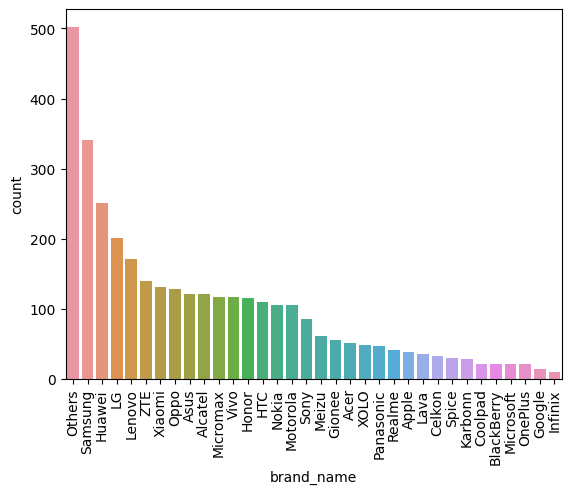

In [24]:
sns.countplot(data=df, x=df['brand_name'],order=df['brand_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

#### 2 OS

In [25]:
df['os'].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

In [26]:
df['os'].value_counts(True)

os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64

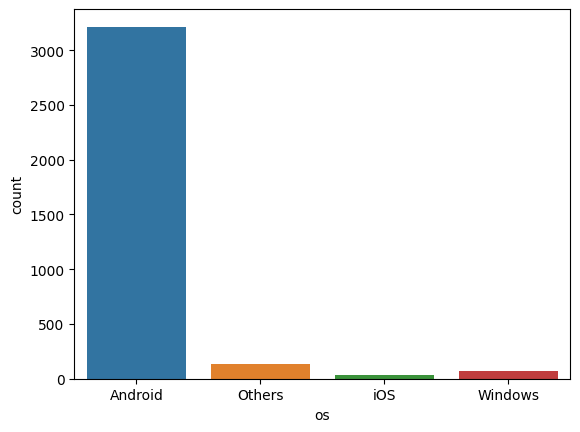

In [27]:
sns.countplot(data=df,x=df['os'])
plt.show()

#### 3 Screen Size

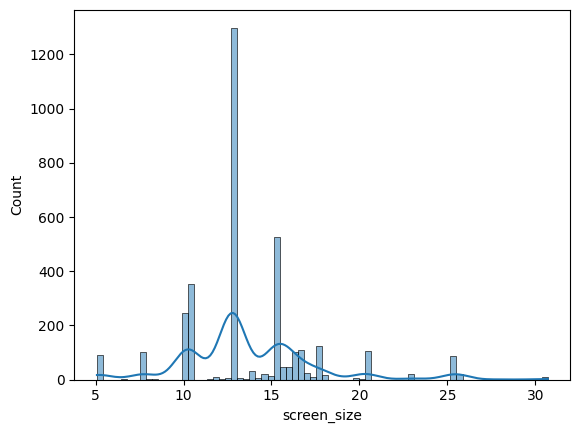

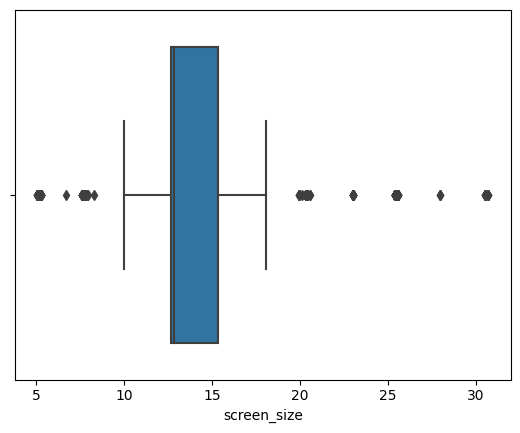

In [28]:
sns.histplot(data=df,x=df['screen_size'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['screen_size'])
plt.show()

#### 4 4G

In [29]:
df['4g'].value_counts()

4g
yes    2335
no     1119
Name: count, dtype: int64

In [30]:
df['4g'].value_counts(True)

4g
yes    0.676028
no     0.323972
Name: proportion, dtype: float64

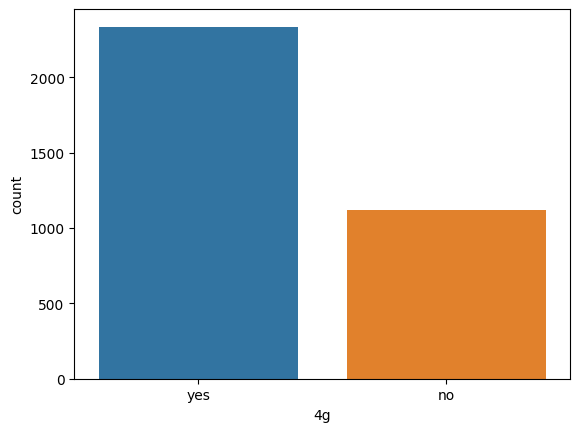

In [31]:
sns.countplot(data=df,x=df['4g'])
plt.show()

#### 5 5G

In [32]:
df['5g'].value_counts()

5g
no     3302
yes     152
Name: count, dtype: int64

In [33]:
df['5g'].value_counts(True)

5g
no     0.955993
yes    0.044007
Name: proportion, dtype: float64

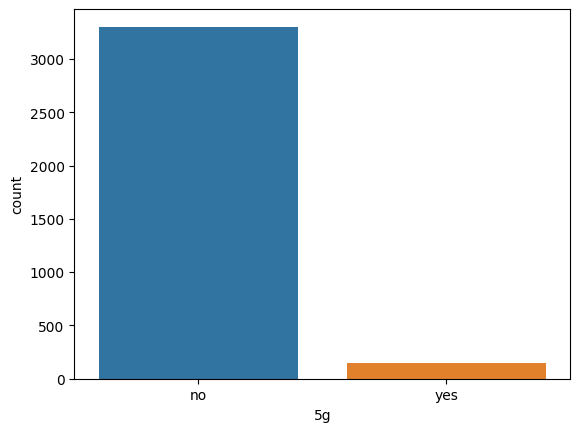

In [34]:
sns.countplot(data=df,x=df['5g'])
plt.show()

#### 6 main_camera_mp

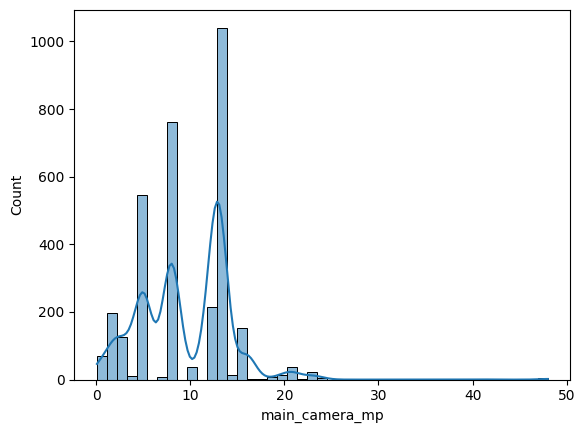

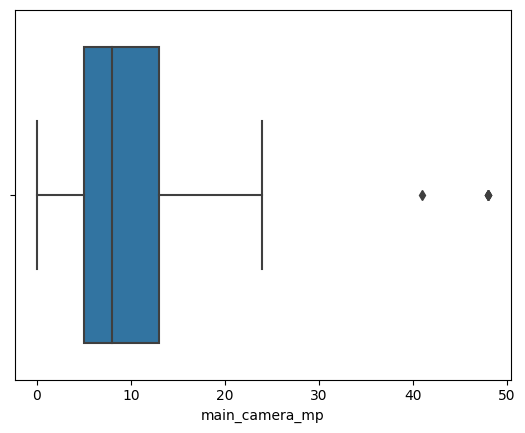

In [35]:
sns.histplot(data=df,x=df['main_camera_mp'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['main_camera_mp'])
plt.show()

#### 7 selfie_camera_mp

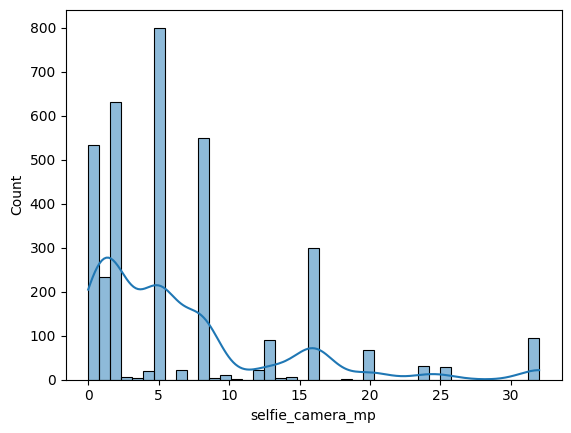

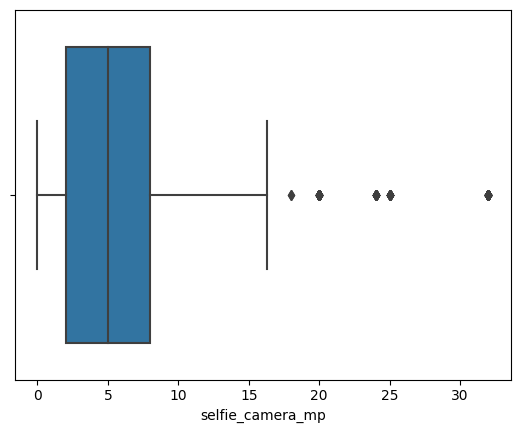

In [36]:
sns.histplot(data=df,x=df['selfie_camera_mp'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['selfie_camera_mp'])
plt.show()

#### 8 int_memory

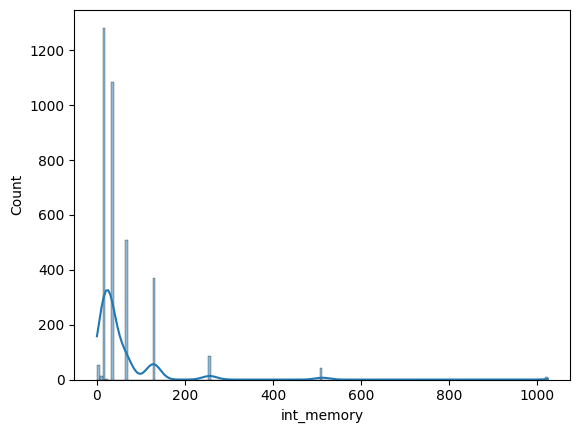

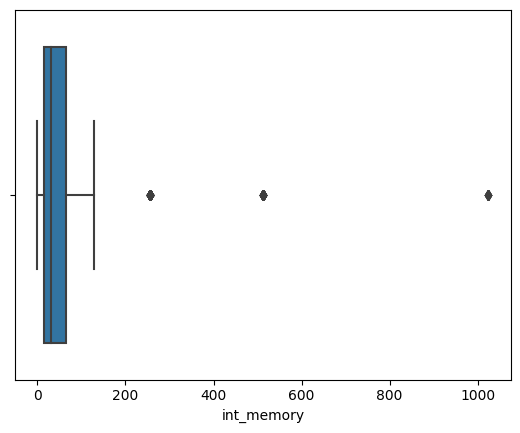

In [37]:
sns.histplot(data=df,x=df['int_memory'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['int_memory'])
plt.show()

#### 9 RAM

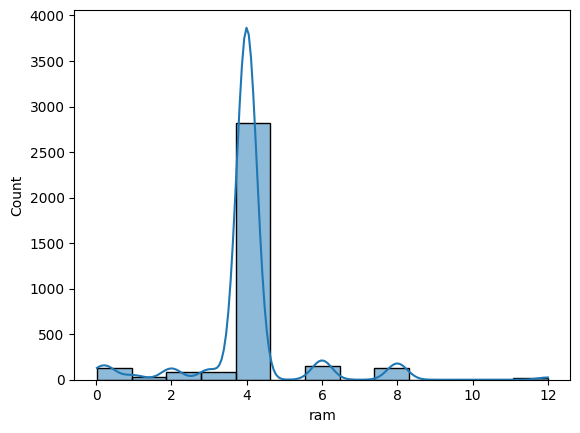

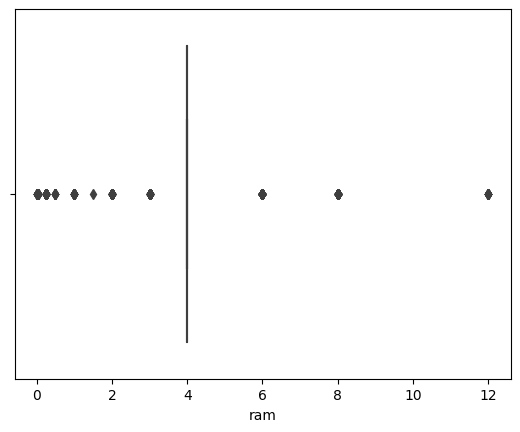

In [38]:
sns.histplot(data=df,x=df['ram'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['ram'])
plt.show()

#### 10 Battery

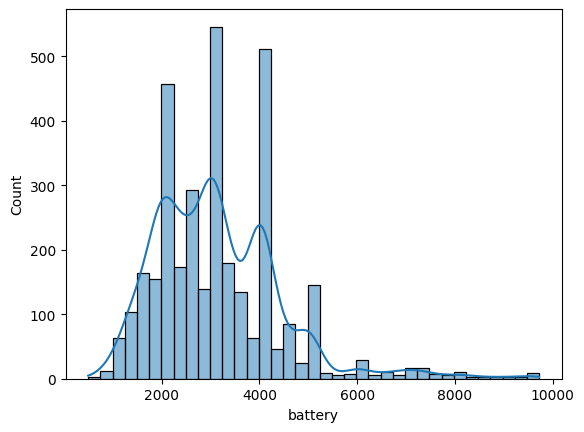

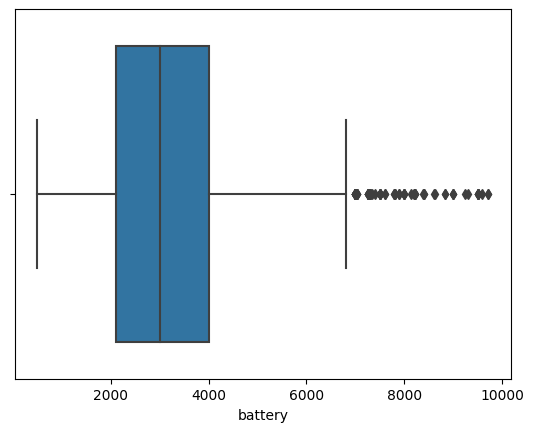

In [39]:
sns.histplot(data=df,x=df['battery'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['battery'])
plt.show()

#### 11 Weight

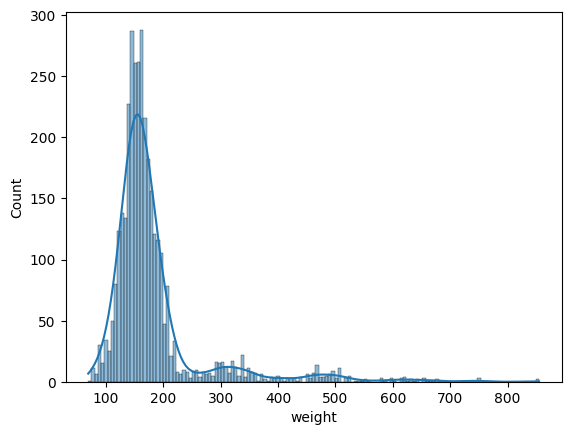

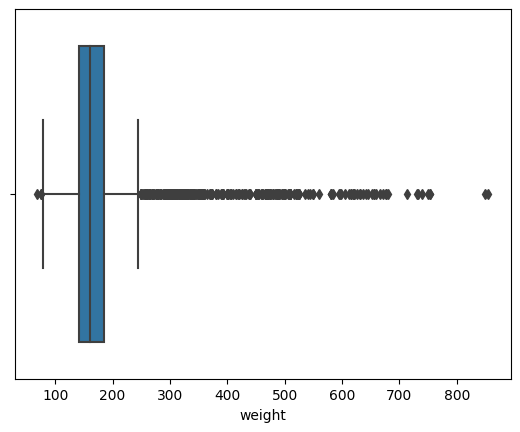

In [40]:
sns.histplot(data=df,x=df['weight'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['weight'])
plt.show()

#### 12 Release_year

In [41]:
df['release_year'].value_counts(True)

release_year
2014    0.185871
2013    0.165026
2015    0.149102
2019    0.129126
2016    0.110886
2018    0.093225
2017    0.086566
2020    0.080197
Name: proportion, dtype: float64

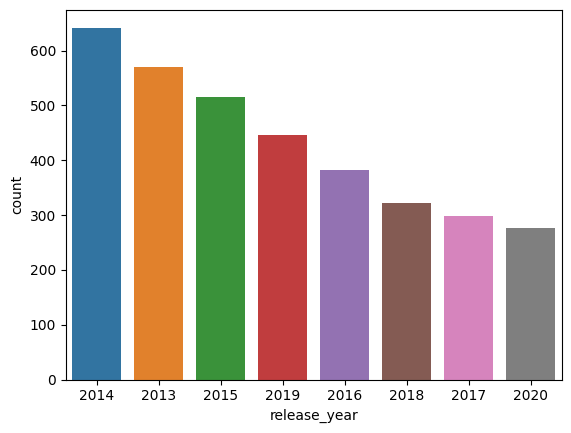

In [42]:
sns.countplot(data=df,x=df['release_year'],order=df['release_year'].value_counts().index)
plt.show()

#### 13 days_used

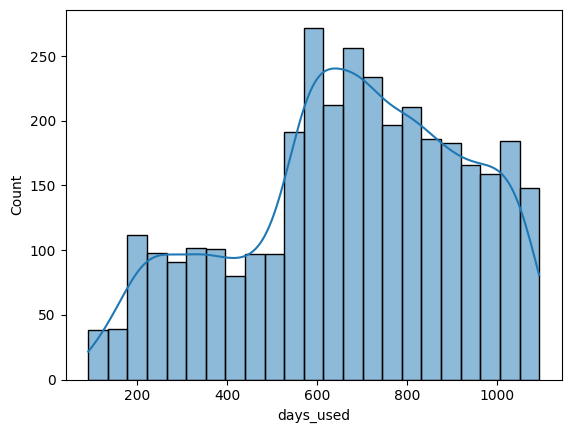

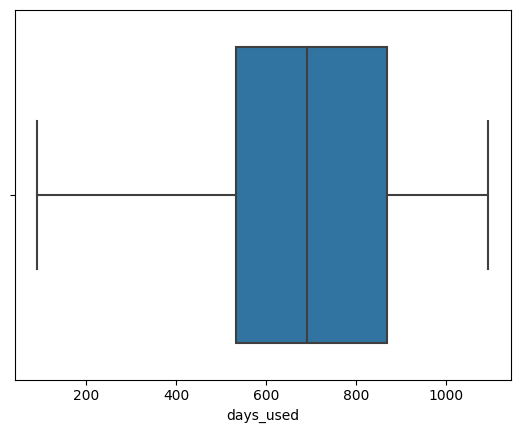

In [43]:
sns.histplot(data=df,x=df['days_used'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['days_used'])
plt.show()

#### 14 normalized_new_price

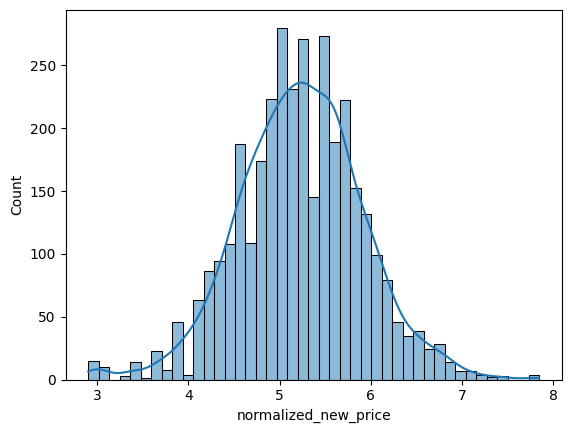

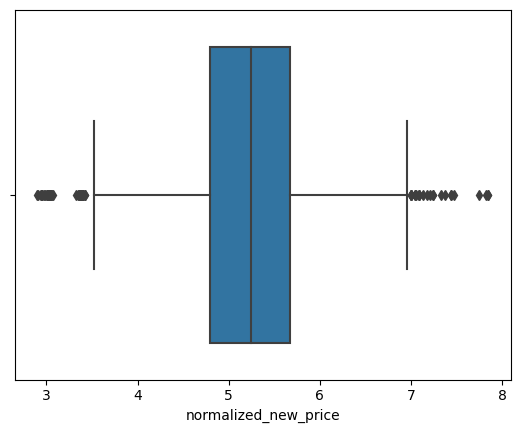

In [44]:
sns.histplot(data=df,x=df['normalized_new_price'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['normalized_new_price'])
plt.show()

#### 15 normalized_used_price

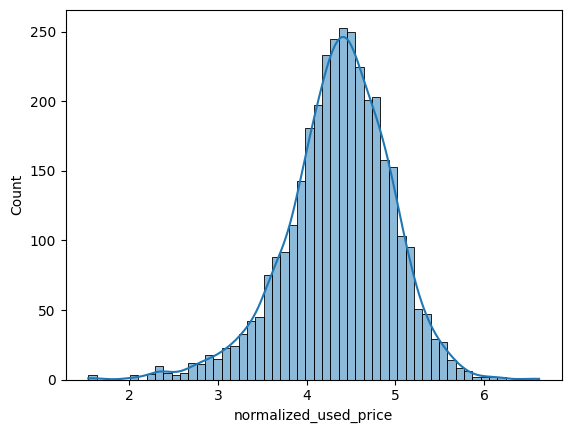

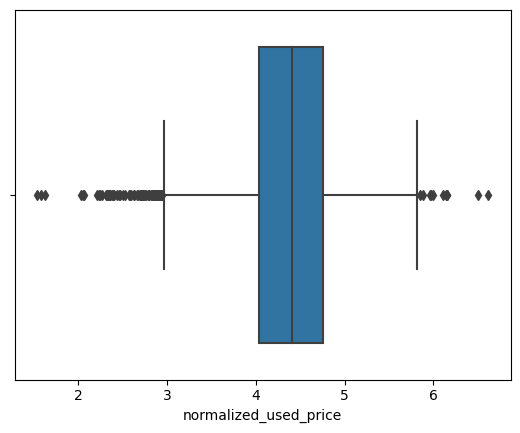

In [45]:
sns.histplot(data=df,x=df['normalized_used_price'],kde=True)
plt.show()
sns.boxplot(data=df,x=df['normalized_used_price'])
plt.show()

#### **Observation on Univariate analysis:**
##### 1 Brand name: There are 34 unique brand names in this dataset. (502 or 14.5%) brand name are (others), (341 or 9.9%) are Samsung, (251 or 7.3%) are Huawei, (201 or 5.9%) are LG, and (171 or 5%) are Lenovo.
##### 2 OS: There are 4 unique os systems in this datasets. The majority of them (3214 or 93%) are Android.
##### 3 Screen size: the distribution of the screen size maybe be normal but it is affected by the outliers, and has many modes. Also, the difference between the maximum and the minimum is significant, where maximum screen size is around 30 cm and the minimum is around 5 cm only. All this could be explained by the existence of different kinds of devices like tablets, smartphones, non-smartphone, old fashioned and new fashioned devices.
##### 4 4G: (2335 or 68%) of devices are supporting 4G.
##### 5 5G: (3302 or 96%) of devices are NOT supporting 5G.
##### 6 Main camera mp: the distribution of the main camera mp is affected by the outliers and also has many modes
##### 7 Selfie camera mp: the distribution of the selfie camera mp is affected by the outliers and also has many modes, and it is also skewed to the right.
##### 8 internal memory: the distribution of the internal memory is affected by the outliers and also has many modes
##### 9 RAM: the distribution of the RAM may be normal. It is also affected by some outliers.
##### 10 Battery: the distribution of the battery is multimode and has outliers. It is also skewed to the right.
##### 11 Weight: the distribution of the weight is highly skewed to the right and affected by a considerable number of outliers.
##### 12 Release year: 18% of devices were released in 2014, 16% in 2013. This suggests that older devices are the most furbrished.
##### 13 Days used: . The distribution of the days used is skewed to the left.
##### 14 Normalized new price: the distribution of normalized new prices is normal but affected by some outliers.
##### 15 Normalized used price: the distribution of normalized used prices is normal but affected by some outliers.

### **Bivariate Analysis**

#### 1 Correlation between the Variables

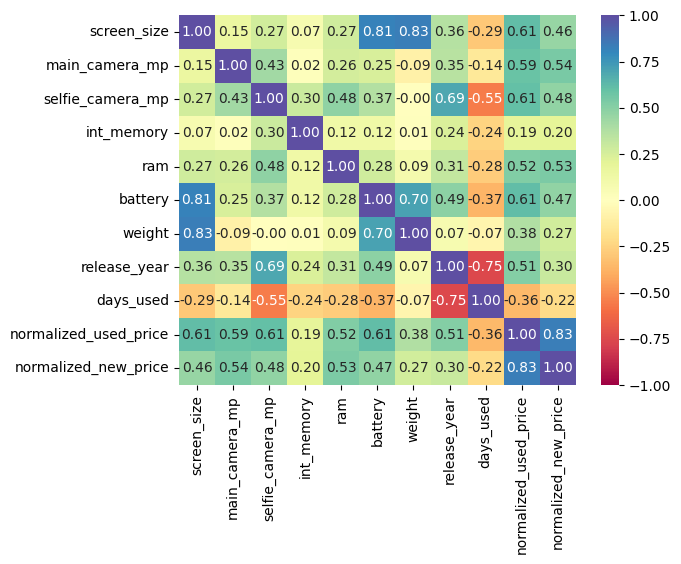

In [46]:
sns.heatmap(df[num_col].corr(),annot=True,vmin=-1,vmax=+1,fmt='.2f',cmap='Spectral')
plt.show()

#### 2 Brand name vs OS

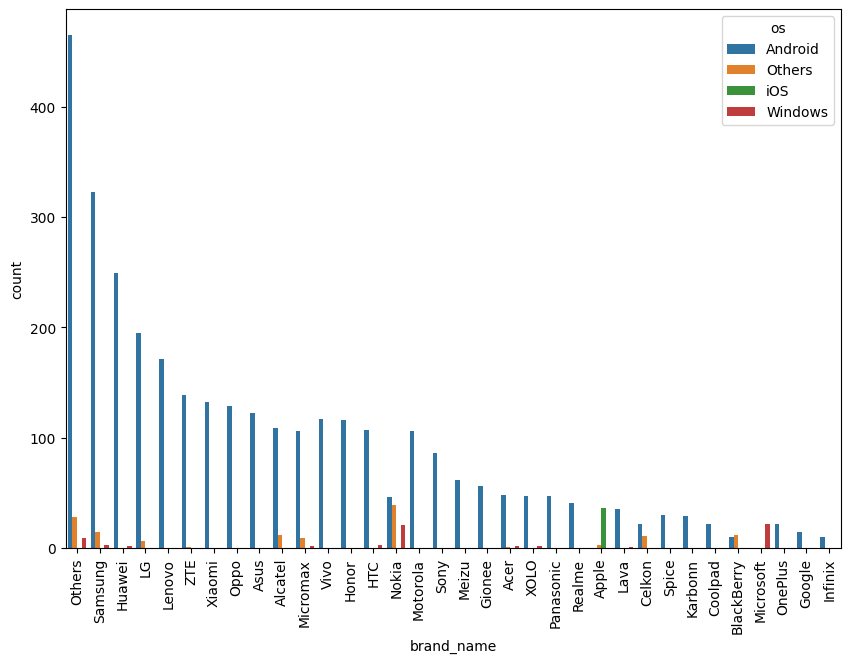

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['brand_name'],hue=df['os'],order=df['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 3 Brand vs screen size

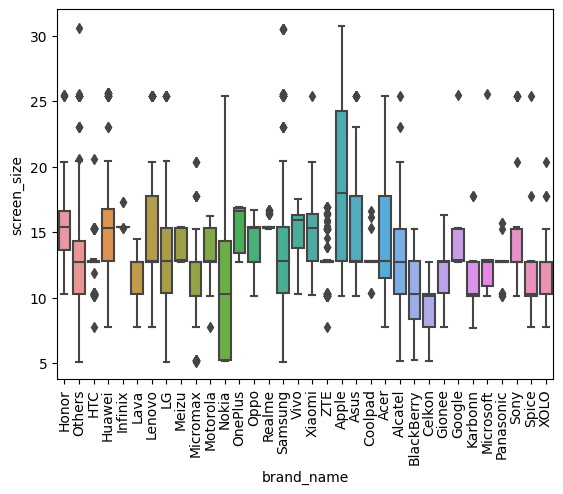

In [48]:
sns.boxplot(data=df,x=df['brand_name'],y=df['screen_size'])
plt.xticks(rotation=90)
plt.show()

#### 3 Brand vs 4G

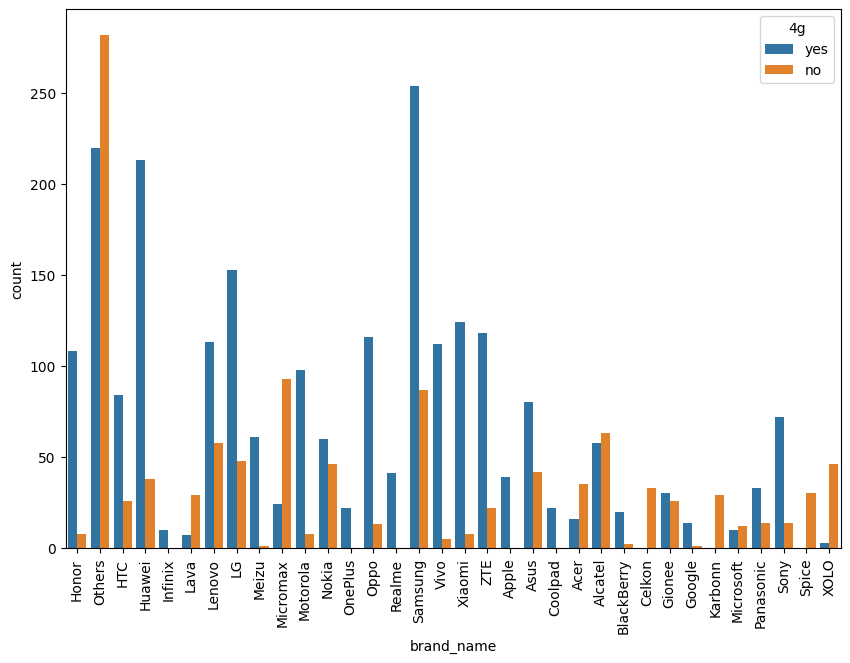

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['brand_name'],hue=df['4g'])
plt.xticks(rotation=90)
plt.show()

#### 4 Brand vs 5G

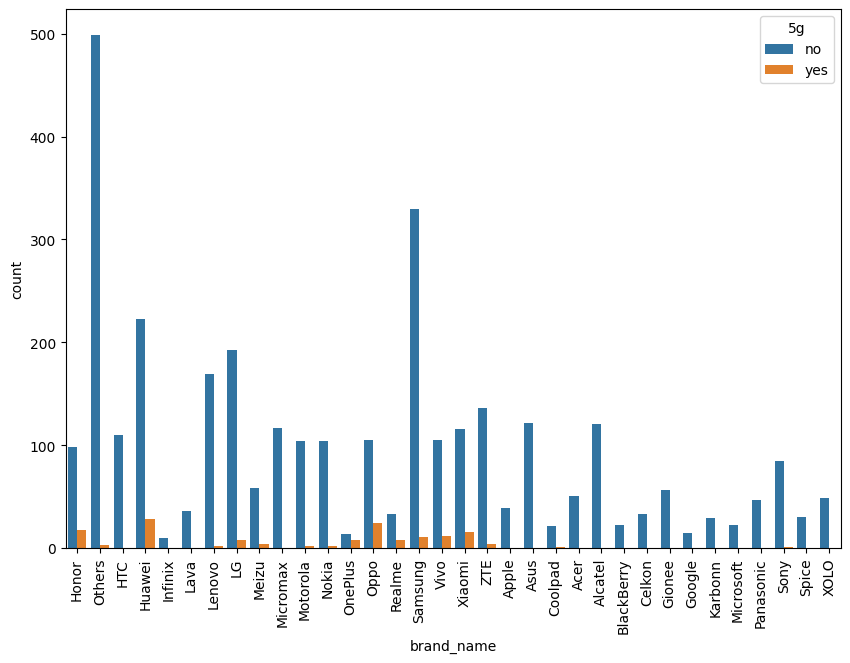

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x=df['brand_name'],hue=df['5g'])
plt.xticks(rotation=90)
plt.show()

#### 5 Brand vs RAM

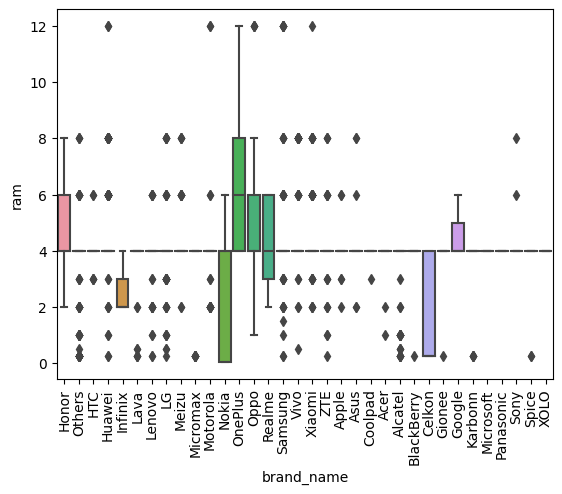

In [51]:
sns.boxplot(data=df,x=df['brand_name'],y=df['ram'])
plt.xticks(rotation=90)
plt.show()

#### 6 Brand vs Battery

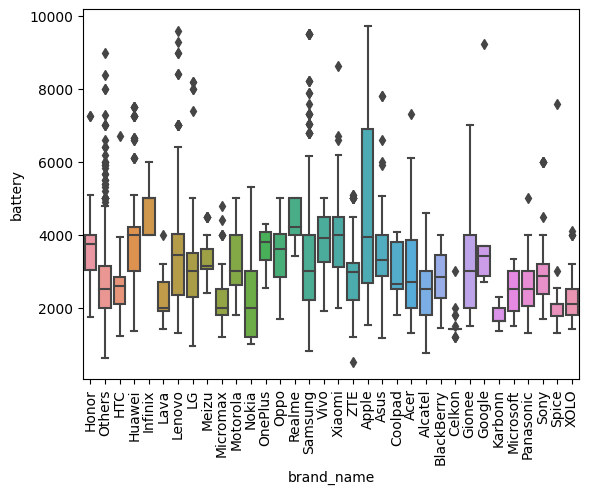

In [52]:
sns.boxplot(data=df,x=df['brand_name'],y=df['battery'])
plt.xticks(rotation=90)
plt.show()

#### 7 Brand vs Main Camera mp

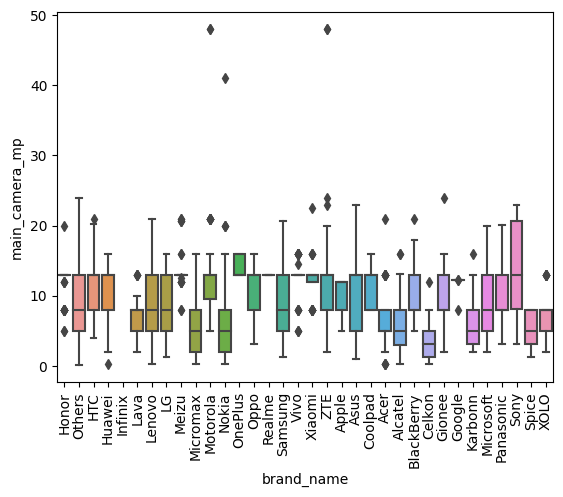

In [53]:
sns.boxplot(data=df,x=df['brand_name'],y=df['main_camera_mp'])
plt.xticks(rotation=90)
plt.show()

#### 8 Brand vs Selfie camera mp

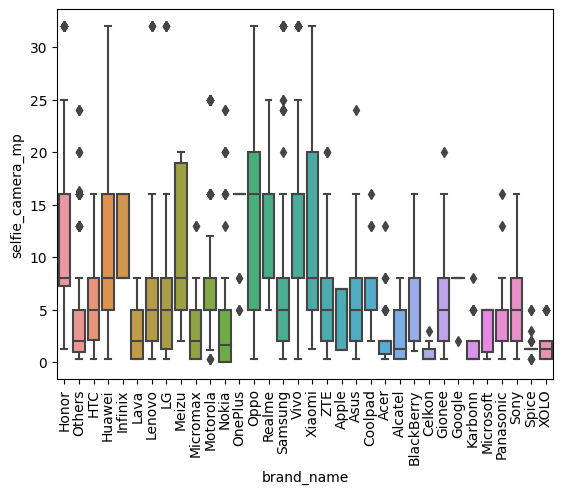

In [54]:
sns.boxplot(data=df,x=df['brand_name'],y=df['selfie_camera_mp'])
plt.xticks(rotation=90)
plt.show()

#### 9 Brand vs Int memory

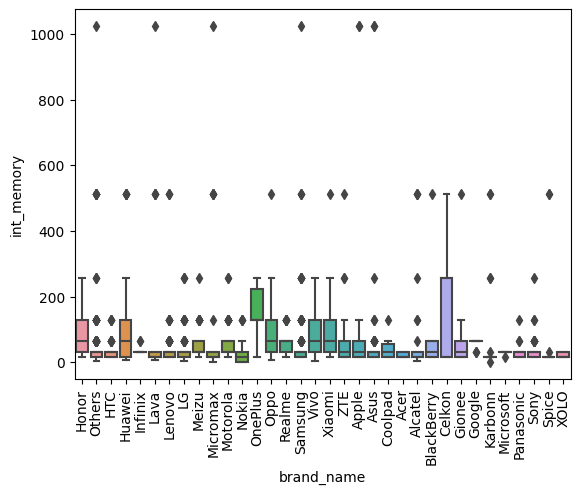

In [55]:
sns.boxplot(data=df,x=df['brand_name'],y=df['int_memory'])
plt.xticks(rotation=90)
plt.show()

#### 10 Brand vs Weight

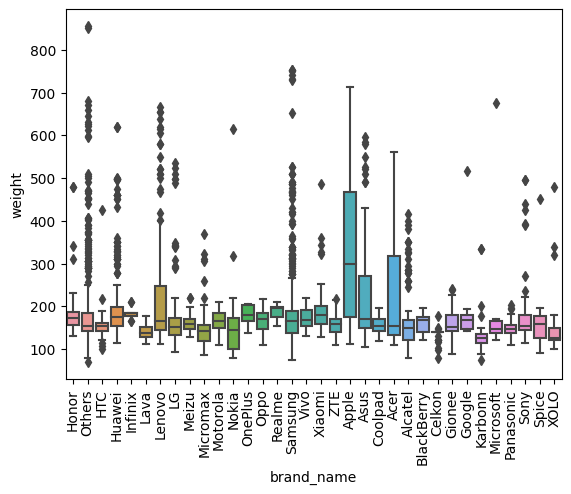

In [56]:
sns.boxplot(data=df,x=df['brand_name'],y=df['weight'])
plt.xticks(rotation=90)
plt.show()

#### 11 Brands vs Days used

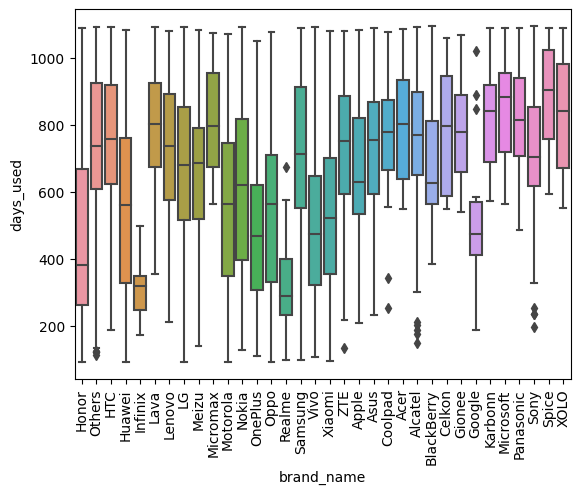

In [57]:
sns.boxplot(data=df,x=df['brand_name'],y=df['days_used'])
plt.xticks(rotation=90)
plt.show()

#### 12 Brand vs Normalized new price

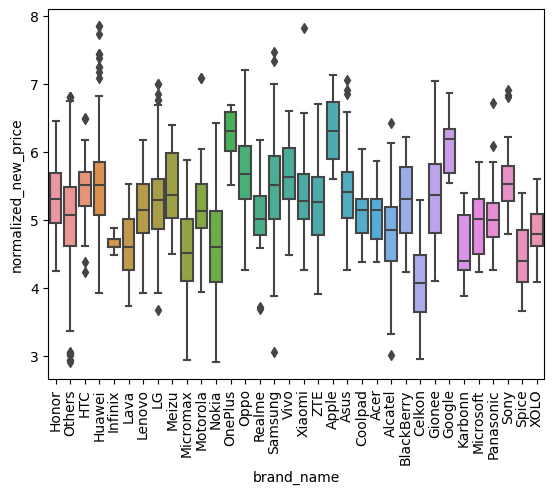

In [58]:
sns.boxplot(data=df,x=df['brand_name'],y=df['normalized_new_price'])
plt.xticks(rotation=90)
plt.show()

#### 13 Brand vs Normalized used price

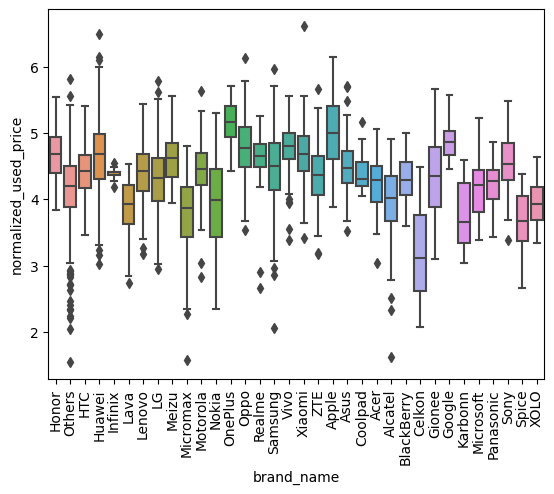

In [59]:
sns.boxplot(data=df,x=df['brand_name'],y=df['normalized_used_price'])
plt.xticks(rotation=90)
plt.show()

#### 14 Release year vs Normalized Used price

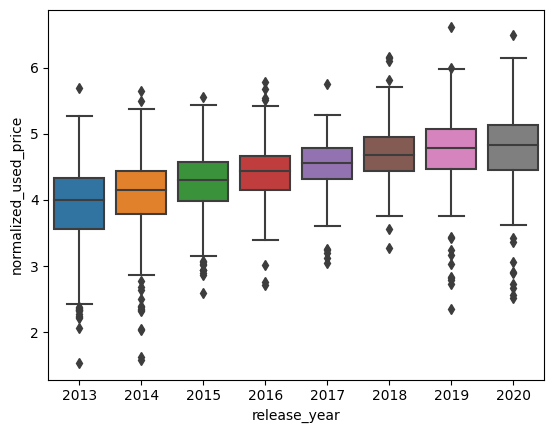

In [60]:
sns.boxplot(data=df,x=df['release_year'],y=df['normalized_used_price'])
plt.show()

#### **Observations on Multivariate analysis:**

#### **Observation on correlation:**

##### 1 normalized used prices are highly positively correlated with normalized new prices (83%).
##### 2 release year is highly negatively correlated with days used (-75%).
##### 3 screen size is also highly positevely correlated with both battery and weight (81% and 83% respectively). Moreover, weight and battery are highly positively correlated (70%). This suggests that devices with bigger screen size tend to have a bigger battery and hence weight more.
##### 4 days used is negatively correlated with selfie camera mp, ram, battery which suggests that the more the device is used the lower its performance and hence its price is lower since the correlation is negative with the normalized used price.
##### 5 Normalized used price vs release year: New devices tend to have higher used price.

#### **Observations on variables:**

##### 1 Brand vs OS: Majority of Brands have Android system. However, Microsoft only has Windows, Blackberry has more (other) os than Android (this is because Blackberry developed its own os in the past), and Apple has its own OS which is ios.
##### 2 Brand vs Screen size: Apple devices have the biggest screen size.
##### 3 Brand vs 4G: Samsung has the most devices with 4G while most of the devices with (other) brand name does not have 4G.
##### 4 Very few brands have 5G coverage, the most popular brands that provide 5G are Huawei, Honor,Xiamo ,Oppo.
##### 5 Brand vs RAM: because the devices in this datasets are a mixture of tablets, high end smartphones, and low end smartphones, we can observe alot of outliers and also differences in rams. Oneplus has a high median ram of around 6Gb. On the other hand, Samsung, Nokia, LG, ZTE, are older brands and their rams are much lower.
##### 6 Brand vs Battery: Apple and Xiamo, Realme, have cose battery energy in median, however, Apple has the highest maximum battery energy.
##### 7 Brand vs main camera mp: Sony seems to have high main camera resolution with a median around 12 mp.
##### 8 Brand vs selfie camera mp: Oppo selfie camera seems to be really high in resolutino with a median around 16 mp. We can also observe significant differences between brands, where some are really low in resolution (Xolo,Nokia,Alcatel,..).
##### 9 Brand vs int memory: we can observe that most of the brands are ranging at the same level of int memory, however, they are witnessing outliers. Those outliers could be a result of the different type of devices the brand offers (tablet, smartphone,...).
##### 10 Brand vs Weight: in general, Apple weights more, however, again we observe alot of outliers for the same reason that brands offer different type of devices.
##### 11 Brand vs days used: Spice has the highest median of around 903 days, while Realme has a median of around 288 days.
##### 12 Brand vs Normalized new price: Apple, Oneplus, and Google seem to be the most expensive brands. Also, Huawei has alot of outliers with very expensive prices.
##### 13 Brand vs Normalized used price: Celkon has very low used price, and also there are some  outliers in (others) brand which have low prices.
##### 14 Battery vs Weight: the relation between Battery and weight is positively correlated, meaning that the better the capacity of the battery, the heavier the device. However, we could see some abnormal outliers where the device is very heavy but its battery capacity is pretty low.




# Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### 1 Missing value treatment

In [61]:
# missing values in the dataset
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [62]:
# create a copy of the dataset
df_copy = df.copy()

In [63]:
# input median in the missing values (this is because the dataset has a significant amount of outliers)
# first the main camera mp
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df_copy[col] = df_copy[col].fillna(
        value=df_copy.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# checking for missing values
df_copy.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### We will impute the remaining missing values in the data by the column medians grouped by brand_name

In [64]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df_copy[col] = df_copy[col].fillna(
        value=df_copy.groupby(["brand_name"])[col].transform("median")
    )

# checking for missing values
df_copy.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

#### We will fill the remaining missing values in the main_camera_mp column by the column median.

In [65]:
df_copy["main_camera_mp"] = df_copy["main_camera_mp"].fillna(df_copy["main_camera_mp"].median())

# checking for missing values
df_copy.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### 2 Feature engineering (if needed)

#### at this stage I will not do feature engineering

In [66]:
df_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


#### 3 Outlier detection and treatment (if needed)

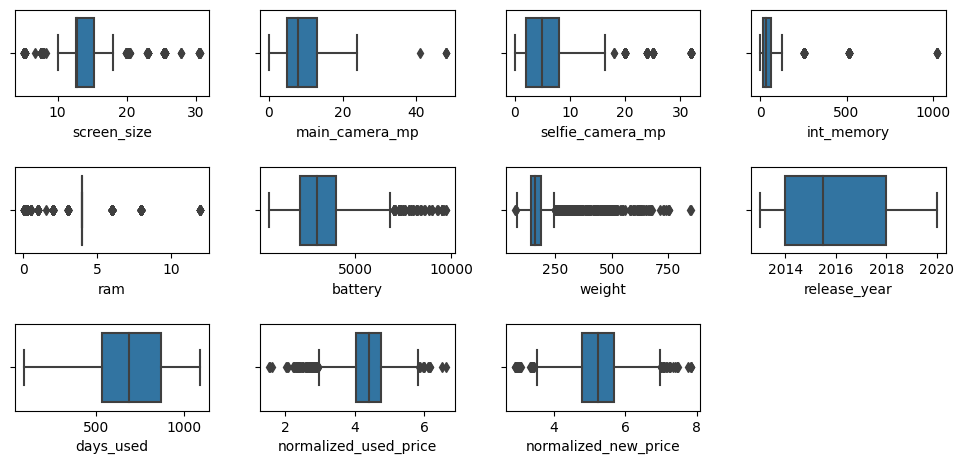

In [67]:
# outlier detection using boxplot
num_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_copy, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Observation on outliers: although the variables are presenting outliers, we will keep those outliers as they may have a signinficant role in the analysis. This is because they are presenting the differences in the devices.

#### 4 Preparing data for modeling

In [68]:
# create dummy variables
df_copy = pd.get_dummies(df_copy, columns=['brand_name','4g','5g','os'], drop_first=True)
df_copy.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,4g_yes,5g_yes,os_Others,os_Windows,os_iOS
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,False,False,False,False,False,True,False,False,False,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,False,False,False,False,False,True,True,False,False,False
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,False,False,False,False,False,True,True,False,False,False
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,False,False,False,False,False,True,True,False,False,False
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,False,False,False,False,False,True,False,False,False,False


#### 5 Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [69]:
### since we didnt create any new variables and the missing values that were imputed are very few, there is no need to redo the EDA.

# Model Building - Linear Regression

#### split data into training and testing

In [70]:
# independent variables
X = df_copy.drop(['normalized_used_price'], axis=1)
# dependent variable
y = df_copy[['normalized_used_price']]

#### add intercept to the dataset

In [71]:
# let's add the intercept to data
X = sm.add_constant(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

#### fit linear regression

In [73]:
olsmod = sm.OLS(y_train.astype(float), X_train.astype(float))
olsres = olsmod.fit()

In [74]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                           22:02:38   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observation of first run model:
##### 1 In the first attempt we are running all the variables.
##### 2 R_Square and R_Square adjusted are (0.845 & 0.842) respectevily, which means that around 84% of the variation of the dependent variable is explained by this model.
##### 3 We can observe that there are some attributes with P_value > 0.05. Those variables do not add any value and thus we will start to drop them one by one while also making sure that the R_Square is not dropping radically.



### Remove variables and re run the model

In [75]:
# independent variables
X = df_copy.drop(['normalized_used_price','brand_name_Alcatel','brand_name_Apple','brand_name_Asus', 'brand_name_BlackBerry','brand_name_Celkon','brand_name_Coolpad',
                  'brand_name_Gionee','brand_name_Google','brand_name_HTC','brand_name_Honor', 'brand_name_Huawei','brand_name_Infinix',
                  'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
                  'brand_name_Motorola','brand_name_Nokia','brand_name_OnePlus','brand_name_Oppo','brand_name_Others','brand_name_Panasonic','brand_name_Realme',
                  'brand_name_Samsung','brand_name_Sony','brand_name_Spice','brand_name_Vivo','brand_name_XOLO','brand_name_ZTE','int_memory','days_used','5g_yes',
                  'os_Windows','os_iOS','battery'], axis=1)
# dependent variable
y = df_copy[['normalized_used_price']]

In [76]:
# let's add the intercept to data
X = sm.add_constant(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [78]:
olsmod = sm.OLS(y_train.astype(float), X_train.astype(float))
olsres = olsmod.fit()

In [79]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1277.
Date:                   Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                           22:02:40   Log-Likelihood:                 97.448
No. Observations:                   2417   AIC:                            -172.9
Df Residuals:                       2406   BIC:                            -109.2
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observation on the final run
#### 1 after removing some attributes, we can notice that all attributes have p_value less than 0.05 now.
#### 2 also, we can notice that the R_square and adj R_square were not affected by the elimination of attributes and still at 84%.
#### 3 the model now seems to be satisfying.

# Model Performance Check

### check for Multicollinearity


In [80]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.astype(float).shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   2.186093e+06
screen_size             6.711968e+00
main_camera_mp          1.903139e+00
selfie_camera_mp        2.482821e+00
ram                     1.643463e+00
weight                  5.460908e+00
release_year            2.835869e+00
normalized_new_price    2.375538e+00
brand_name_Xiaomi       1.033962e+00
4g_yes                  2.132379e+00
os_Others               1.442209e+00
dtype: float64



#### Observation of VIF: all attributions have VIF less than 5. Except for screen size (6.7) and weight (5.4). However, we will NOT eliminate any of the two attributes.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### For Linear Regression, we need to check if the following assumptions hold:-
##### Linearity
##### Independence
##### Homoscedasticity
##### Normality of error terms
##### No strong Multicollinearity

In [81]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.858563,0.228925
1,4.448399,4.588390,-0.139990
2,4.315353,4.282574,0.032778
3,4.282068,4.218741,0.063327
4,4.456438,4.469903,-0.013465


#### Test for linearity and dependency

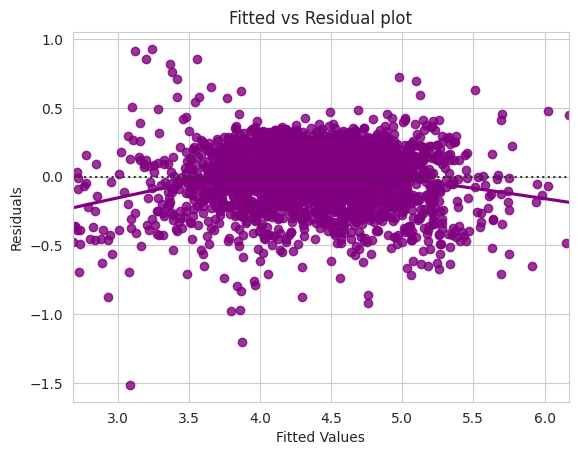

In [82]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### there is no pattern between the fitted and the residual plots. This satisfies the two assumptions of linearity and dependency.

#### Test for normality

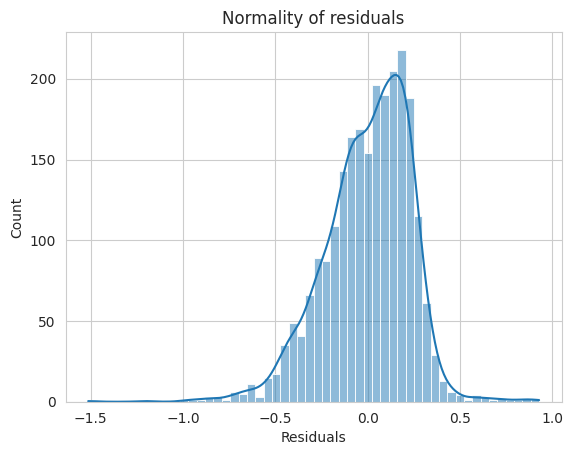

In [83]:
# normality of the residuals
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

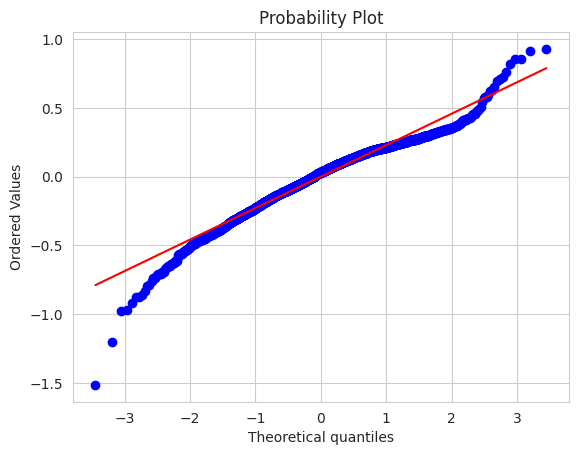

In [84]:
# Q Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Most of the points are lying on the straight line in QQ plot

#### Shapiro test

In [85]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9680551290512085, pvalue=9.269710753013787e-23)

#### Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
#### Strictly speaking, the residuals are not normal.However, as an approximation, we can accept this distribution as close to being normal.
#### So, the assumption is satisfied.

#### Test for Homoscedasticity

In [86]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [87]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train.astype(float))
lzip(name, test)

[('F statistic', 1.0387914023172224), ('p-value', 0.25515727399621485)]

#### Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

# Final Model

In [88]:
# let's check the model parameters
olsres.params

const                  -36.786749
screen_size              0.023631
main_camera_mp           0.020691
selfie_camera_mp         0.013847
ram                      0.015936
weight                   0.000857
release_year             0.018893
normalized_new_price     0.420338
brand_name_Xiaomi        0.081165
4g_yes                   0.045834
os_Others               -0.061056
dtype: float64

In [89]:
# Let us write the equation of linear regression
Equation = "price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres.params[i], "* (", X_train.columns[i], ")")

price = -36.786748610066574 + 0.02363104281679089 * ( screen_size ) +  0.020690665453453088 * ( main_camera_mp ) +  0.013847486419548275 * ( selfie_camera_mp ) +  0.01593557922752592 * ( ram ) +  0.0008570886494692412 * ( weight ) +  0.018892675463638757 * ( release_year ) +  0.420338050062317 * ( normalized_new_price ) +  0.08116548033990549 * ( brand_name_Xiaomi ) +  0.04583415967350938 * ( 4g_yes ) +  -0.061056055264215044 * ( os_Others )


#### We can now use the model for making predictions on the test data

In [90]:
X_train.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'weight', 'release_year', 'normalized_new_price', 'brand_name_Xiaomi',
       '4g_yes', 'os_Others'],
      dtype='object')

In [91]:
X_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'weight', 'release_year', 'normalized_new_price', 'brand_name_Xiaomi',
       '4g_yes', 'os_Others'],
      dtype='object')

In [92]:
# let's make predictions on the test set
y_pred = olsres.predict(X_test)

In [93]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
#def mape_score(targets, predictions):
    #return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [94]:
# checking model performance on train set 
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsres, X_train, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232409,0.182462,0.84146,0.840734,0.043826


In [95]:
# checking model performance on test set 
print("Testing Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsres, X_test, y_test
)
olsmodel_final_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236931,0.1828,0.844359,0.842689,0.044593


### **Observation:**

#### 1 RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.

#### 2 MAE indicates that our current model is able to predict normalized used phone prices within a mean error of ~0.24 euros on test data.

#### 3 The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.

#### 4 MAPE of ~4.5 on the test data indicates that the model can predict within ~4.5% of the normalized used phone price.

# Actionable Insights and Recommendations

### **Insights**

#### 1 we created a model that predicts the price of a used / refurbished device. The model is able to explain around 84% of the variation in the data.

#### 2 the model can predict the normalized used device price within ~4.6%, so it is good for predictive purposes.

#### 3 The most significant predictors of the normalized used device price are the normalized price of a new device of the same model, the weight of the devices screen, the resolution of the rear and front cameras, the years since the original release of the device, the amount of RAM, the availability of 4G and 5G network.

#### 4 we observed that the normalized used price of a refurbished device is positively correlated with ( normalized new price = 0.83, screen size = 0.62,main camera mp = 0.59, selfie camera mp = 0.61, ram = 0.52, battery = 0.61, release year = 0.51, ad weight 0.38) and is negatively correlated with the number of days the device was used (-0.36).

#### 5 the attributes included in the model are: (screen_size, main_camera_mp, selfie_camera_mp, ram, weight, release_year, normalized_new_price, brand_name_Xiaomi, 4g_yes, os_Others)


### **Recommendations**

#### 1 Since the data collected and included in this model are ONLY focusing on the features and the charactaristics of the devices, it would be helpful to collect data on the clients themselves. For example, age, income, gender, ... such inputs will help to gain better insights into the preferences of customers across different price segments.

#### 2 It would be a good idea to include one attribute that differntiate the devices (tablets, smartphones, low end phones) this is because the outliers that we detected could be indicating those differences.

#### 3 ReCell should look to attract people who want to sell used phones and tablets which were originally released in recent years and have good front and rear camera resolutions.

#### 4 Devices with more RAM and 4G connectivity are also good candidates for reselling to certain customer segments.

#### 5 ReCell should also try to gather and put up phones having a high price for new models to try and increase revenue.

#### 6 ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.


-


___